In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

# read file from lsun
filename = "/home/dd/Ubu20/ppdbscan/data/Lsun.csv"
p_list = []
with open(filename) as f:
    line = f.readline()
    while line:
        line_list = line.split(",")
        line_int_list = []
        for item in line_list:
            line_int_list.append(int(item))
        p_list.append(line_int_list)
        line = f.readline()

In [15]:
# split as 3 cluster
p_list = np.asarray(p_list) # point info stored as np array
cid_set = set(p_list[:, -1])
# print(cid_set)
clu_dict_list = dict()
for item in cid_set:
    clu_dict_list[item] = []
for p in p_list:
    clu_dict_list[p[-1]].append(list(p[:2])) # store as list

In [16]:
# calculate cluster center
center_dict = dict()
for id in clu_dict_list.keys():
    clu_p_list = clu_dict_list[id]
    clu_p_list = np.asarray(clu_p_list)
    center_dict[id] = []
    for i in range(clu_p_list.ndim):
        center_dict[id].append(int(sum(clu_p_list[:,i])/len(clu_p_list)))
print(center_dict)

{1: [1858085, 517830], 2: [999166, 3519289], 3: [2934852, 2559311]}


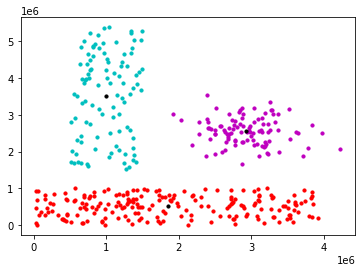

In [17]:
# draw a image to show result
colors = np.array(
    ['g', 'r', 'c', 'm', 'y', 'k', 'w', '#2ecc71', '#ff7f50', '#2ed573', '#f0932b', '#82589f', '#7efff5',
     '#ea5514', '#6a8d52',
     '#12507b', '#e94829',
     '#ddbb99', '#2c4f54', '#c3d825', '#cc7eb1', '#c9171e', '#ea5506'])
x = p_list[:,0]
y = p_list[:,1]

# paint points
for i in range(len(p_list)):
    plt.scatter(x[i], y[i], s=10, c=colors[p_list[i,-1]])
# paint centers
for cen in center_dict.values():
    plt.scatter(cen[0], cen[-1], s=10, c='black')
plt.show()

In [18]:
# calculate data range of each cluster
data_range = dict()
for id in clu_dict_list.keys():
    c_p_list = clu_dict_list[id]
    c_p_list = np.asarray(c_p_list)
    data_range[id] = []
    # calculate max/min value of each dimension
    for dim in range(c_p_list.ndim):
        max_val = max(c_p_list[:, dim])
        min_val = min(c_p_list[:, dim])
        data_range[id].append([min_val, max_val])
print(data_range)

{1: [[29780, 3928676], [4658, 997386]], 2: [[519795, 1496690], [1534234, 5385811]], 3: [[1919251, 4229498], [1668478, 3532294]]}


In [19]:
# generate data of different number
num = int(600/3)
for id in clu_dict_list.keys():
    c_p_list = clu_dict_list[id]
    tmp_data_range = data_range[id]
    center_list = center_dict[id]
    for t in range(num):
        randlist = []
        for i in range(len(c_p_list[0])):
            randlist.append(random.randrange(center_list[i]-500,center_list[i]+500, 3))
        c_p_list.append(randlist)

400
300
300


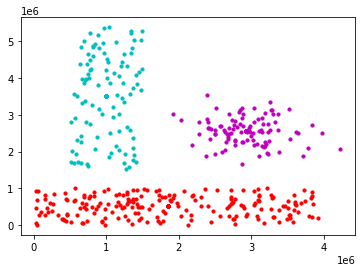

In [20]:
filename = "/home/dd/Ubu20/ppdbscan/data/Lsun-1k.csv"
with open(filename, "w") as f:
    for key in clu_dict_list.keys():
        c_p_list = clu_dict_list[key]
        for i in range(len(c_p_list)):
            line = str(c_p_list[i][0]) + "," + str(c_p_list[i][1]) + "," + str(key) + '\n'
            plt.scatter(c_p_list[i][0], c_p_list[i][1], s=10, c=colors[key])
            f.writelines(line)
        print(len(c_p_list))
    plt.show()

